## Introduction

### Importing data

In [1]:
from biograph.protein import Protein

PDB can be imported directly from its path or from a Bio.PDB.Structure.Structure

In [3]:
# From a filepath
Protein("1A3Z.pdb")

In [5]:
# From a biopython object
from Bio.PDB import PDBParser
parser = PDBParser()
pdb = parser.get_structure("pdb_id", "1A3Z.pdb")
Protein(pdb)

## pandas.DataFrame functions

In [6]:
prot = Protein(pdb)

In [7]:
# Get head of DataFrame representation
prot.head()

,bfactor,chain,coord,disordered_flag,element,full_id,mass,resname,occupancy,x,y,z
0,24.56,A,"[-13.443, 0.459, 26.82]",0,N,"(pdb_id, 0, A, ( , 6, ), (N, ))",14.0067,THR,1.0,-13.443,0.459,26.820000
1,24.95,A,"[-12.624, 0.502, 28.063]",0,C,"(pdb_id, 0, A, ( , 6, ), (CA, ))",12.0107,THR,1.0,-12.624,0.502,28.063000
2,26.52,A,"[-13.312, -0.216, 29.261]",0,C,"(pdb_id, 0, A, ( , 6, ), (CB, ))",12.0107,THR,1.0,-13.312,-0.216,29.261000
3,29.76,A,"[-14.35, -1.084, 28.788]",0,O,"(pdb_id, 0, A, ( , 6, ), (OG1, ))",15.9994,THR,1.0,-14.350,-1.084,28.788000
4,26.72,A,"[-13.915, 0.806, 30.256]",0,C,"(pdb_id, 0, A, ( , 6, ), (CG2, ))",12.0107,THR,1.0,-13.915,0.806,30.256001
5,22.90,A,"[-11.224, -0.087, 27.826]",0,C,"(pdb_id, 0, A, ( , 6, ), (C, ))",12.0107,THR,1.0,-11.224,-0.087,27.826000
6,25.05,A,"[-11.068, -1.125, 27.18]",0,O,"(pdb_id, 0, A, ( , 6, ), (O, ))",15.9994,THR,1.0,-11.068,-1.125,27.180000
7,19.31,A,"[-10.219, 0.582, 28.379]",0,N,"(pdb_id, 0, A, ( , 7, ), (N, ))",14.0067,TRP,1.0,-10.219,0.582,28.379000
8,17.27,A,"[-8.832, 0.148, 28.283]",0,C,"(pdb_id, 0, A, ( , 7, ), (CA, ))",12.0107,TRP,1.0,-8.832,0.148,28.283001
9,18.25,A,"[-7.924, 1.371, 28.266]",0,C,"(pdb_id, 0, A, ( , 7, ), (CB, ))",12.0107,TRP,1.0,-7.924,1.371,28.266001


In [8]:
# access DataFrame
prot.df.resname.str.lower().head()

0    thr
1    thr
2    thr
3    thr
4    thr
Name: resname, dtype: object

You can choose whether to initialize the DataFrame when generating Protein or not, in which case will need to call Protein.generate_dataframe()

In [9]:
prot = Protein(pdb, generate_dataframe=False)
prot.df # nothing happens!

So first you will need to call 

In [10]:
prot.generate_dataframe()

In [11]:
prot.df.resname.str.lower().head()

0    thr
1    thr
2    thr
3    thr
4    thr
Name: resname, dtype: object

When generating the DataFrame you can choose to raise an exception or not if there are null values in coordinates column. Default is not to raise error but to generate null values, but you can change this behaviour.

In [12]:
prot.df[~prot.df.coord.isnull()].shape # not-null coordinates

(1204, 12)

In [13]:
prot.df[prot.df.coord.isnull()].shape # null coordinates

(0, 12)

## Structure model

In [14]:
prot.df = prot.df[~prot.df.coord.isnull()]

In [15]:
prot.df.head()

,bfactor,chain,coord,disordered_flag,element,full_id,mass,resname,occupancy,x,y,z
0,24.56,A,"[-13.443, 0.459, 26.82]",0,N,"(pdb_id, 0, A, ( , 6, ), (N, ))",14.0067,THR,1.0,-13.443,0.459,26.820000
1,24.95,A,"[-12.624, 0.502, 28.063]",0,C,"(pdb_id, 0, A, ( , 6, ), (CA, ))",12.0107,THR,1.0,-12.624,0.502,28.063000
2,26.52,A,"[-13.312, -0.216, 29.261]",0,C,"(pdb_id, 0, A, ( , 6, ), (CB, ))",12.0107,THR,1.0,-13.312,-0.216,29.261000
3,29.76,A,"[-14.35, -1.084, 28.788]",0,O,"(pdb_id, 0, A, ( , 6, ), (OG1, ))",15.9994,THR,1.0,-14.350,-1.084,28.788000
4,26.72,A,"[-13.915, 0.806, 30.256]",0,C,"(pdb_id, 0, A, ( , 6, ), (CG2, ))",12.0107,THR,1.0,-13.915,0.806,30.256001


In [16]:
prot.df["atom_name"] = prot.df["full_id"].apply(lambda x: x[4][0])

In [17]:
atoms = prot.df.loc[prot.df["atom_name"] == "CA", "coord"] 

In [18]:
import numpy as np
atoms = np.array([list(i) for i in atoms]) # esto hay que resolverlo, para que pueda tomar listas y series directamente

Now we can generate a 3d mesh representation of the protein using Delaunay

In [19]:
prot.generate_structure(atoms)

You can access structure from .structure

In [20]:
prot.structure

In addition, you can plot the structure from different views. A step in the triangulation process is needed to define the representation

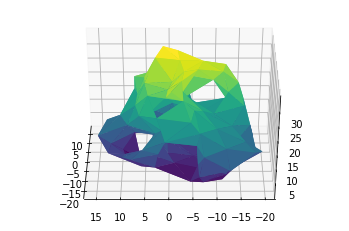

In [29]:
%matplotlib inline
prot.structure.plot(389, 5)

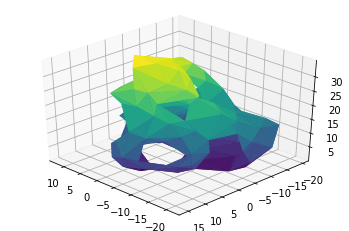

In [31]:
prot.structure.plot(389, 4)

### Using persistent homology

In [23]:
from biograph.structure import Perseus
perseus = Perseus()

In [24]:
perseus.execute_persistent_hom(prot)

In [25]:
prot.structure.persistent_hom_params

{'b0_step': 357, 'b1_step': 389, 'b2_step': 566, 'b3_step': 566}

## Graph models

In [32]:
from biograph.graph_models import StructureGraphGenerator

In [34]:
graph_model = StructureGraphGenerator()

In [35]:
prot.generate_graph(graph_model, {"step":389})

In [39]:
prot.graph